### 1. Keras Sequential model:

In [ ]:
"import librairies"

#### 1.1. Read in the data and explore:

In [ ]:
# Read.


In [ ]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Scale the X data use min max scaller and fit transform.


In [ ]:
# Spit the data into training and testing.


#### 1.2. Define a Sequential model:

In [ ]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))    # Add a output layer for linear regression.

In [ ]:
# Summary of the model.
my_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [ ]:
# Hyperparameters.
n_epochs = **
batch_size = **
learn_rate = ***

In [ ]:
# Define the optimizer and then compile.


#### 1.4. Train the model and visualize the history:

In [ ]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.


In [ ]:
# View the keys.


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

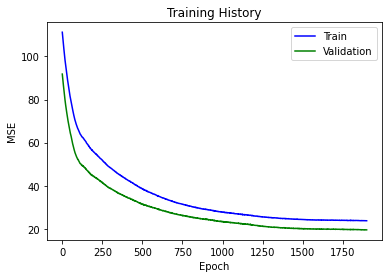

In [ ]:
# Visualize the training history. 
n_skip = 100                 # Skip the first few steps.
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing: 

In [ ]:
# Predict and test using a formula.


5/5 [==============================] - 0s 2ms/step


5.64

In [ ]:
# Use the evaluate() method.


Test RMSE : 5.64
